In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import warnings
warnings.filterwarnings(action = "ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
datadir = "C:/Users/ADITYA NARANJE/DL/Flowers/flowers"
categories = ["rose","dandelion"]

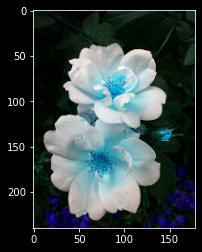

In [3]:
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

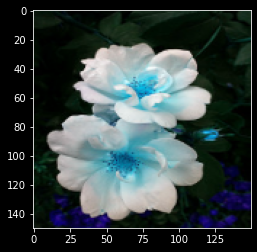

In [4]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []
def creat_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
creat_training_data()

In [6]:
print(len(training_data))

1753


In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
1
1
1
0


In [10]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
y = np.array(y) 
print(X[:1])
len(X)

[array([[[  9,   2,  69],
        [  0,   7,  82],
        [  9,   9, 129],
        ...,
        [152, 171, 178],
        [152, 170, 178],
        [152, 171, 178]],

       [[  9,   6,  60],
        [  4,   6,  91],
        [ 14,  12, 127],
        ...,
        [151, 170, 177],
        [151, 170, 177],
        [152, 171, 178]],

       [[  5,   5,  55],
        [ 11,   6, 106],
        [ 16,   9, 123],
        ...,
        [151, 170, 177],
        [151, 170, 177],
        [152, 171, 178]],

       ...,

       [[  0,  40,  29],
        [  2,  39,  29],
        [  2,  37,  27],
        ...,
        [247, 250, 251],
        [248, 251, 252],
        [249, 252, 253]],

       [[  1,  41,  30],
        [  0,  40,  29],
        [  0,  37,  27],
        ...,
        [248, 250, 251],
        [248, 250, 251],
        [248, 250, 251]],

       [[  0,  39,  27],
        [  0,  39,  27],
        [  1,  39,  28],
        ...,
        [250, 252, 253],
        [250, 251, 253],
        [249, 251, 252]

1753

In [11]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
print(X.shape)

(1753, 150, 150, 3)


In [12]:
X = X/255.

In [13]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.08)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,test_size=0.07)

In [14]:
X_train.shape, X_test.shape, X_valid.shape

((1499, 150, 150, 3), (141, 150, 150, 3), (113, 150, 150, 3))

In [15]:
from keras import layers, models

In [16]:
model = models.Sequential()

In [17]:
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.35))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.35))


model.add(layers.Flatten())
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = keras.optimizers.Adam(lr=0.001),
             metrics  = ["acc"])

In [20]:
cheakpoint = keras.callbacks.ModelCheckpoint("Flowers_1.h5",save_best_only=True)

In [34]:
history = model.fit(X_train,y_train, epochs=5, shuffle=True, validation_data=(X_valid,y_valid),callbacks=[cheakpoint])

Epoch 1/5
47/47 [==============================] - 36s 775ms/step - loss: 0.0948 - acc: 0.9640 - val_loss: 0.2124 - val_acc: 0.9204
Epoch 2/5
47/47 [==============================] - 36s 773ms/step - loss: 0.0792 - acc: 0.9713 - val_loss: 0.2715 - val_acc: 0.8673
Epoch 3/5
47/47 [==============================] - 36s 772ms/step - loss: 0.0794 - acc: 0.9733 - val_loss: 0.2473 - val_acc: 0.8584
Epoch 4/5
47/47 [==============================] - 36s 771ms/step - loss: 0.0589 - acc: 0.9807 - val_loss: 0.2788 - val_acc: 0.8938
Epoch 5/5
47/47 [==============================] - 37s 787ms/step - loss: 0.0555 - acc: 0.9833 - val_loss: 0.3162 - val_acc: 0.8496


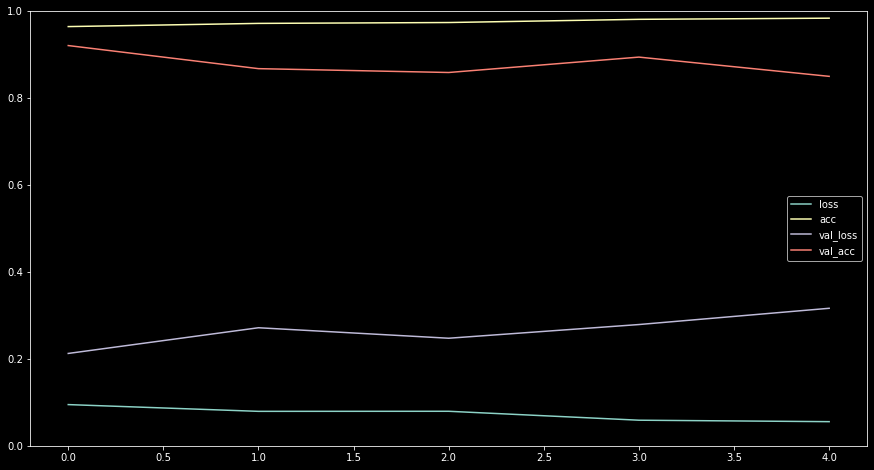

In [35]:
pd.DataFrame(history.history).plot(figsize = (15,8))
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
model.save("Flower_classifier.h5")

In [17]:
model = models.load_model("Flower_classifier.h5")

In [18]:
accuracy = model.evaluate(X_test,y_test)
accuracy[1]

5/5 [==============================] - 1s 132ms/step - loss: 0.1446 - acc: 0.9574


0.957446813583374

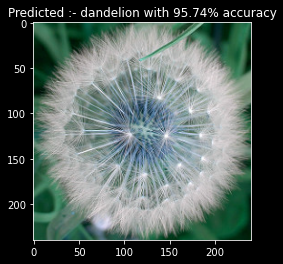

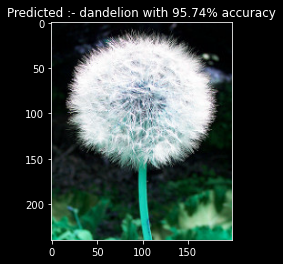

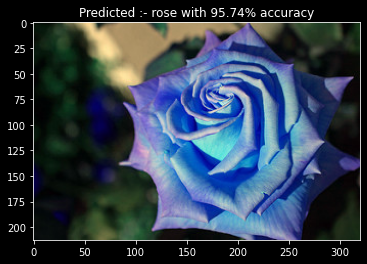

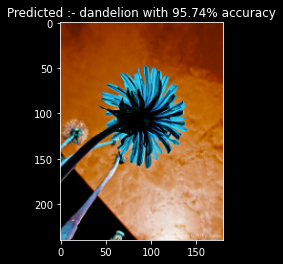

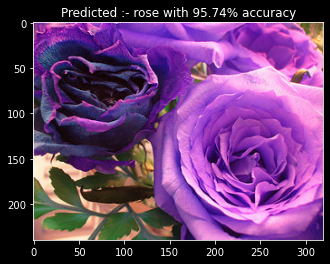

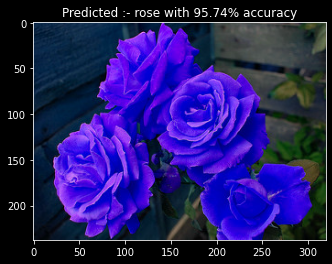

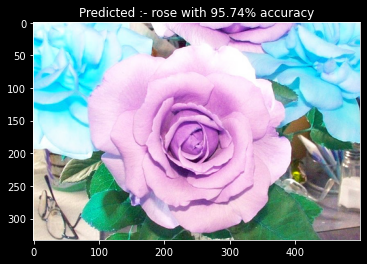

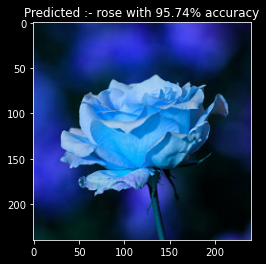

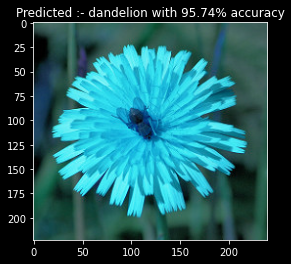

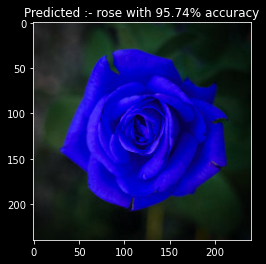

In [29]:
for image in os.listdir(pt):
    img_array = cv2.imread(os.path.join(pt, image))
    new_array = (cv2.resize(img_array, (IMG_SIZE,IMG_SIZE)))/255.
    new = new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    pred = model.predict(new)
    value=np.argmax(pred)
    plt.title("Predicted :- {} with {}% accuracy".format(categories[value],round(accuracy[1]*100,2)))
    plt.imshow(img_array)
    plt.show()